# Mental navigation primate PPC Dandiset 001275 exploration

**Disclaimer:** This notebook was generated automatically using `dandi-notebook-gen`. The code and analyses have **not** been thoroughly reviewed by a human expert. You should critically evaluate the analyses and interpretations before relying on them.

This notebook demonstrates how to explore the Dandiset **Mental navigation primate PPC Neupane_Fiete_Jazayeri (ID: 001275)**, containing neurophysiology recordings during a primate mental navigation task.

The data include multi-electrode neural recordings, behavioral measurements (eye, hand movements), metadata on sessions, and more. The goal is to get started loading, analyzing, and visualizing this rich dataset.

## About the dataset

- **Title**: Mental navigation primate PPC Neupane_Fiete_Jazayeri
- **Dandiset ID**: 001275
- **Version**: draft (2024-12-05)
- **Contributors**: Sujaya Neupane
- **Citation**: Neupane, Sujaya (2024) *Mental navigation primate PPC Neupane_Fiete_Jazayeri (Version draft)* [Data set]. DANDI archive. https://dandiarchive.org/dandiset/001275/draft
- **Description**: Neurophysiology data collected from two primates during a mental navigation task, including extracellular electrophysiology, behavioral data, and spike sorting results.
- **Related study**: https://doi.org/10.1038/s41586-024-07557-z

Data open sourced here focuses on recordings from the posterior parietal cortex.

## List assets in this dandiset

The cell below connects to DANDI and lists available files.

In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001275")
assets = list(dandiset.get_assets())
print(f"Found {len(assets)} assets in this Dandiset.")
for asset in assets:
    print(asset.path)

Found 20 assets in this Dandiset.
sub-mahler/sub-mahler_ses-03122021_behavior+ecephys.nwb
sub-mahler/sub-mahler_ses-03172021_behavior+ecephys.nwb
sub-mahler/sub-mahler_ses-03152021_behavior+ecephys.nwb
sub-mahler/sub-mahler_ses-03182021_behavior+ecephys.nwb
sub-mahler/sub-mahler_ses-03192021_behavior+ecephys.nwb
sub-mahler/sub-mahler_ses-03122021_ecephys.nwb
sub-mahler/sub-mahler_ses-03172021_ecephys.nwb
sub-mahler/sub-mahler_ses-03152021_ecephys.nwb
sub-mahler/sub-mahler_ses-03192021_ecephys.nwb
sub-mahler/sub-mahler_ses-03182021_ecephys.nwb
sub-amadeus/sub-amadeus_ses-06242019_behavior+ecephys.nwb
sub-amadeus/sub-amadeus_ses-01042020_behavior+ecephys.nwb
sub-amadeus/sub-amadeus_ses-06302020_behavior+ecephys.nwb
sub-amadeus/sub-amadeus_ses-07032020_behavior+ecephys.nwb
sub-amadeus/sub-amadeus_ses-07082020_behavior+ecephys.nwb
sub-amadeus/sub-amadeus_ses-06242019_ecephys.nwb
sub-amadeus/sub-amadeus_ses-01042020_ecephys.nwb
sub-amadeus/sub-amadeus_ses-06302020_ecephys.nwb
sub-amadeus/su

## Loading a sample NWB file remotely

We now load one integrated behavioral + ephys NWB file:

`sub-amadeus/sub-amadeus_ses-01042020_behavior+ecephys.nwb`

This is done **without fully downloading** the file via `remfile` and `h5py`.

In [2]:
import pynwb
import h5py
import remfile

nwb_url = "https://api.dandiarchive.org/api/assets/b0bbeb4c-5e0d-4050-a993-798173797d94/download/"
file = remfile.File(nwb_url)
f = h5py.File(file)
io = pynwb.NWBHDF5IO(file=f, load_namespaces=True)
nwb = io.read()

print("NWB Session:", nwb.session_description)
print("Session ID:", nwb.session_id)
print("Subject ID:", nwb.subject.subject_id)
print("Species:", nwb.subject.species)
print("Session Start Time:", nwb.session_start_time)

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB Session: Data from macaque performing mental navigation task. Subject is presented with a start and a target landmark, sampled from a linear map of 6 landmarks on a screen. After a delay, the subject is then cued with a go signal to navigate from start to target landmark with a joystick. Subject should respond by deflecting the joystick in the right direction and holding it until the subject thinks it has arrived at the target landmark. The visual drift or intervening landmarks are all occluded from view making the task a purely mental navigation.
Session ID: 01042020
Subject ID: amadeus
Species: Macaca mulatta
Session Start Time: 2020-01-04 00:00:00-05:00


## Behavioral signals overview

Here we explore behavioral data streams (eye and hand movement).

The plots below show initial snippets (~50,000 samples). You can adjust the sample window or access subsets over different intervals similarly.

**Note:** Remote NWB files can be very large. When accessing data, be mindful to **load manageable chunks**.

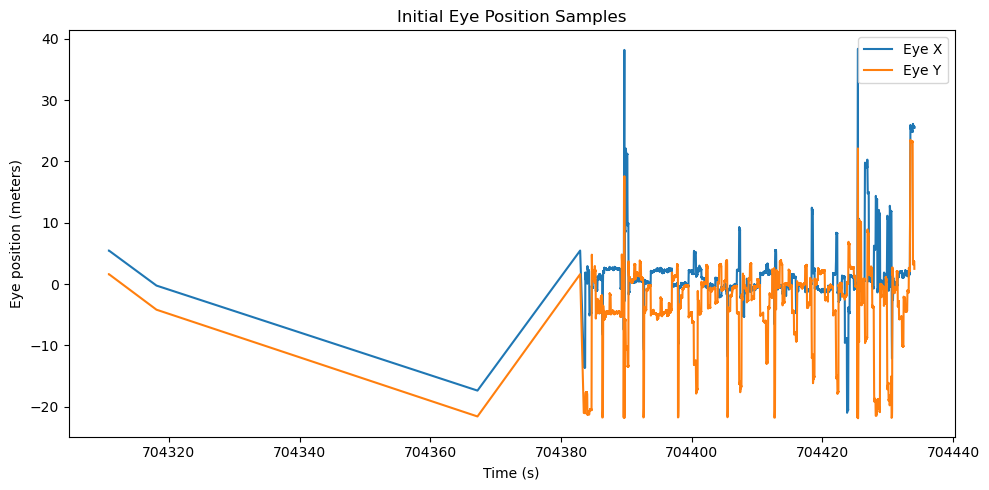

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Eye position
eye_series = nwb.processing["behavior"].data_interfaces["eye_position"]
eye_data = eye_series.data[:50000, :]
eye_times = eye_series.timestamps[:50000]

plt.figure(figsize=(10,5))
plt.plot(eye_times, eye_data[:,0], label='Eye X')
plt.plot(eye_times, eye_data[:,1], label='Eye Y')
plt.xlabel('Time (s)')
plt.ylabel('Eye position (meters)')
plt.title('Initial Eye Position Samples')
plt.legend()
plt.tight_layout()
plt.show()

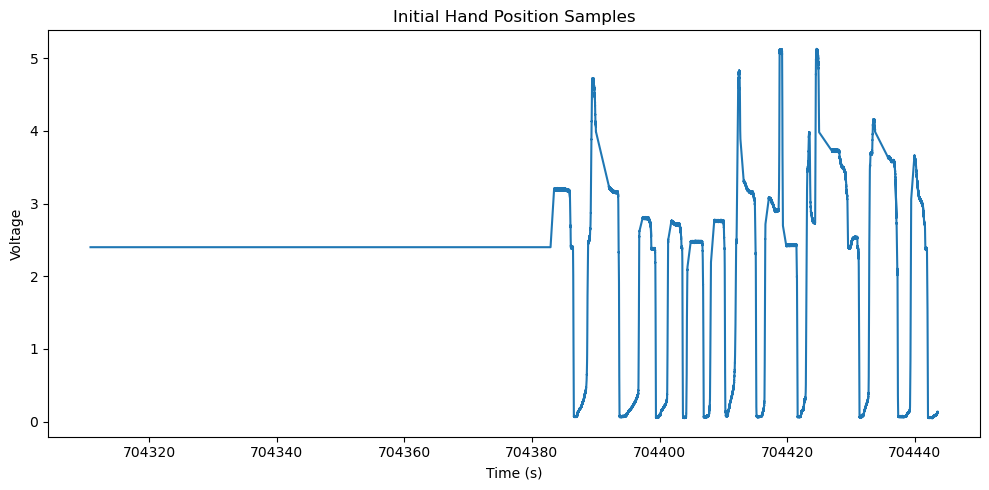

In [4]:
# Hand position
hand_series = nwb.processing["behavior"].data_interfaces["hand_position"]
hand_data = hand_series.data[:50000]
hand_times = hand_series.timestamps[:50000]

plt.figure(figsize=(10,5))
plt.plot(hand_times, hand_data)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Initial Hand Position Samples')
plt.tight_layout()
plt.show()

*In the hand position plot, you see clear transitions from rest to movement indicating joystick dynamics. The eye traces above appeared contaminated with noise/artifacts during this initial segment. Nevertheless, access methods apply for further/better data selections.*

**Tip:** For your own analyses, consider filtering for noise reduction or focusing on subsets corresponding to specific trial intervals found in `nwb.trials` or `nwb.processing` modules.

## About the NWB file contents

- **Units (spikes)**: Located under `nwb.processing["ecephys"].data_interfaces["units"]`
- **LFP / extracellular recording**: Found via `nwb.acquisition` or processing data
- **Trials info**: In `nwb.trials`
- **Electrode metadata**: `nwb.electrodes` with columns such as location, group, gain etc.

For more advanced analysis, consider:

- Visualizing spiking data across units
- Aligning behavior with spiking or LFP signals
- Extracting trial-wise metrics from `nwb.trials`

## Conclusion

This notebook illustrated how to access Dandiset 001275, load NWB data remotely, and visualize behavioral signals. It provides a foundation for deeper analyses combining behavior, spike, and LFP data.

**Remember:** This was generated automatically and might need review and refinement for more conclusive scientific insights.